### 1. Problem Statement 

This project understands how the students's performance (test score) is affected by other varirables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course 

### 2. Data Collection 

Dataset Source -(https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)

The data consists of 8 column and 1000 rows

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.shape

(1000, 8)

In [4]:
data.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
data.duplicated().sum()

0

There are no missing values and no duplicates values in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

1. From above description of numerical data, all the means are very close to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math, for writing much higher 10(minimum) and for reading 17(minimum);

In [13]:
for col in data.columns:
    print(f'Column Name {col}: {data[col].unique()}')
    print('='*40)

Column Name gender: ['female' 'male']
Column Name race/ethnicity: ['group B' 'group C' 'group A' 'group D' 'group E']
Column Name parental level of education: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Column Name lunch: ['standard' 'free/reduced']
Column Name test preparation course: ['none' 'completed']
Column Name math score: [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Column Name reading score: [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  

In [14]:
## define numerical & categorical columns
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O' ]
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O' ]

## print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 3 numerical features : ['math score', 'reading score', 'writing score']
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [15]:
## Adding columns for "Total Score" and "Average"
data['total score'] = data['math score'] + data['reading score'] + data['writing score']
data['average'] = data['total score']/3
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = data[data['reading score'] == 100]['average'].count()
writing_full = data[data['writing score'] == 100]['average'].count()
math_full = data[data['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

print('='*40)

reading_less20 = data[data['reading score'] <= 20]['average'].count()
writing_less20 = data[data['writing score'] <= 20]['average'].count()
math_less20 = data[data['math score'] <= 20]['average'].count()

print(f'Number of students with less than or equal to 20 marks marks in Maths: {math_less20}')
print(f'Number of students with less than or equal to 20 marks in Writing: {writing_less20}')
print(f'Number of students with less than or equal to 20 marks in Reading: {reading_less20}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17
Number of students with less than or equal to 20 marks marks in Maths: 4
Number of students with less than or equal to 20 marks in Writing: 3
Number of students with less than or equal to 20 marks in Reading: 1


Insights
1. From the above values we get students have performed the worst in Maths
2. Best performance is in reading section

### Visualization

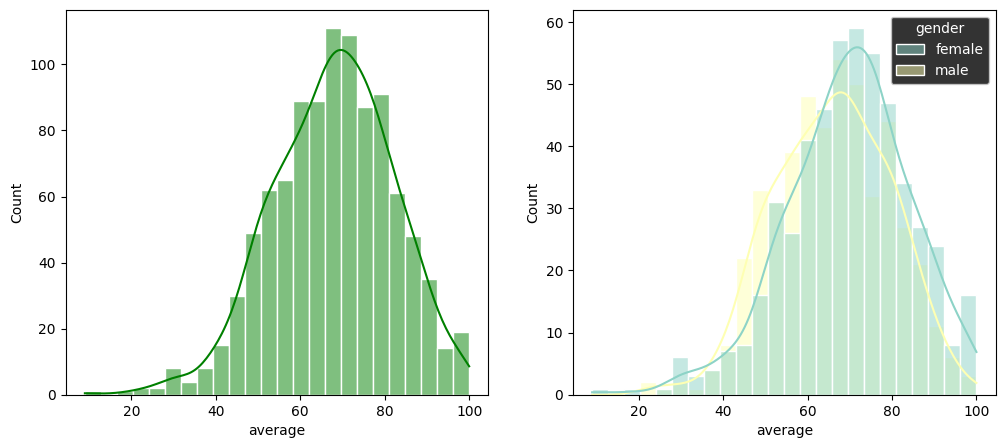

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')
plt.subplot(121)
sns.histplot(data=data, x='average',
             kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='average',
             kde=True, hue='gender')
plt.show()

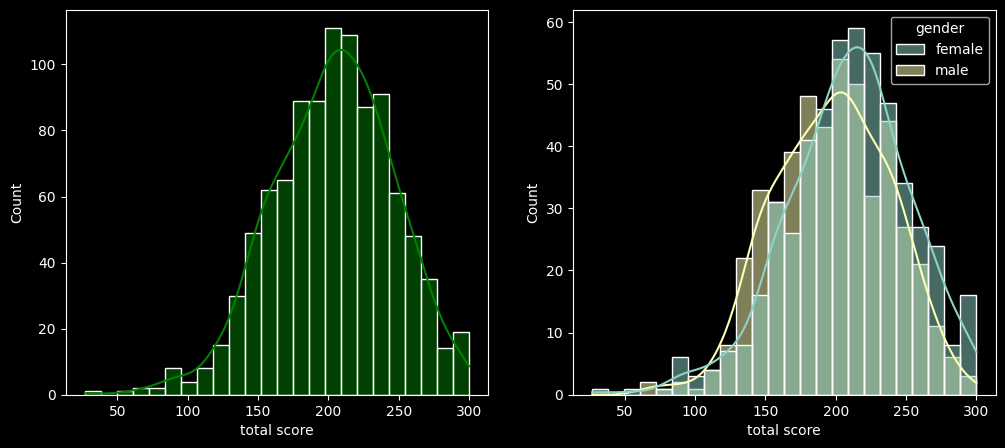

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
plt.style.use('dark_background')
plt.subplot(121)
sns.histplot(data=data, x='total score',
             kde=True, color='g')
plt.subplot(122)
sns.histplot(data=data, x='total score',
             kde=True, hue='gender')
plt.show()

Insights
1. Female students tend to perform well in both on average count as well as total count then male students.

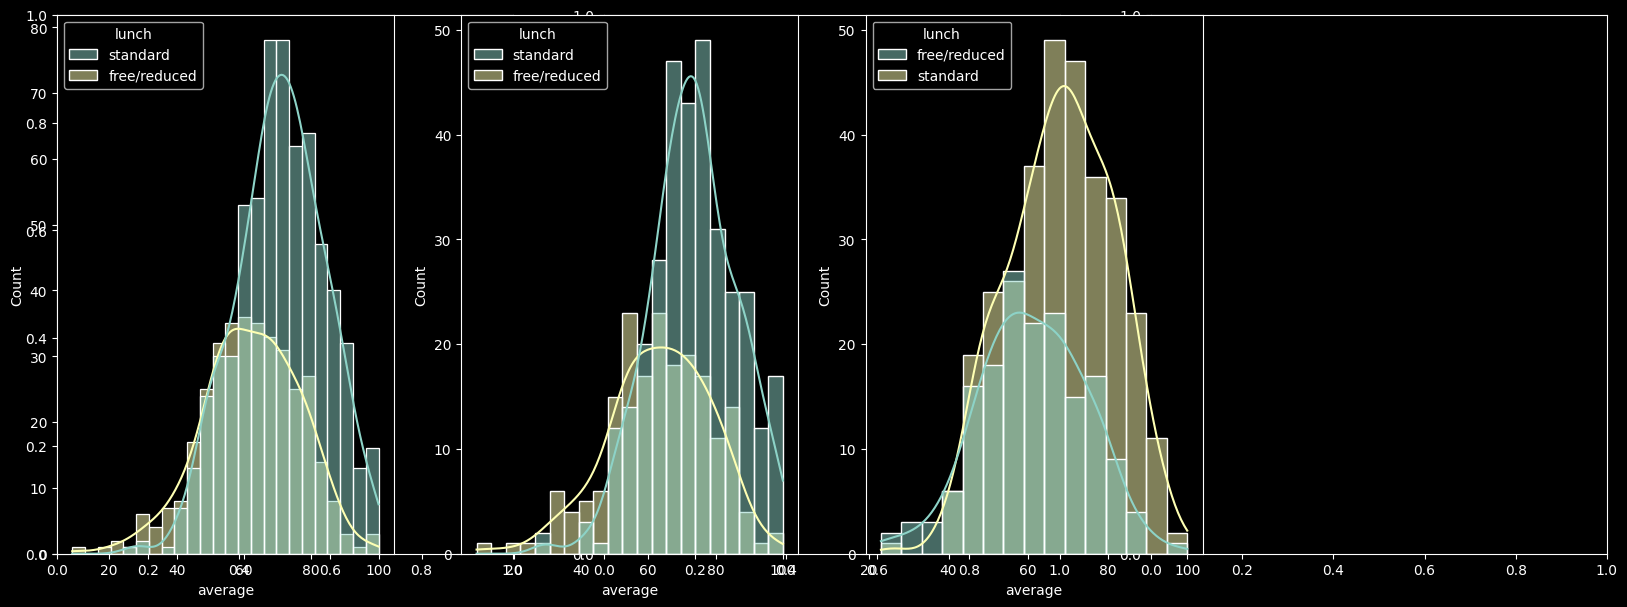

In [ ]:
plt.subplots(1, 3, figsize=(20, 7))
plt.subplot(141)
sns.histplot(data=data, x='average',
             kde=True, hue='lunch'
             )
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average',
             kde=True, hue='lunch'
             )
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average',
             kde=True, hue='lunch'
             )
plt.show()

Insights
1. Standard lunch helps perform well in exams.
2. Both in male and female, standard lunch helps to perform well

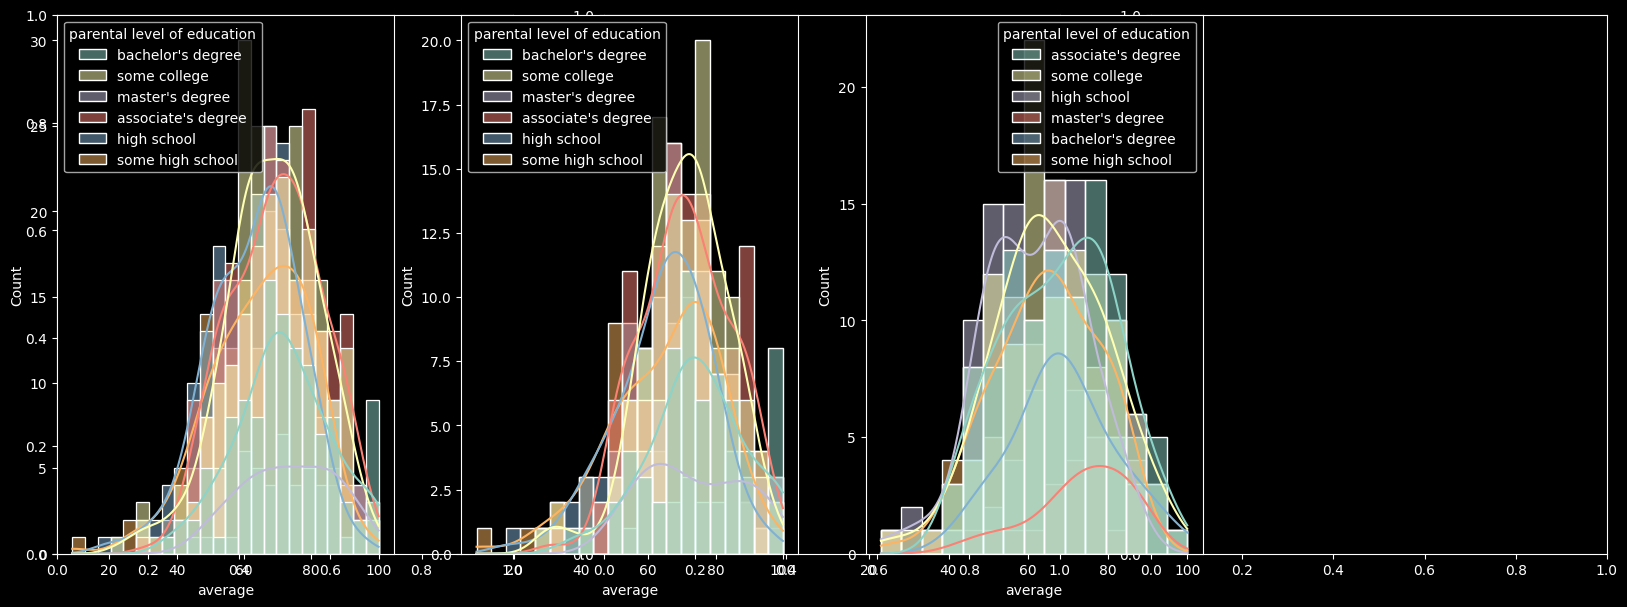

In [25]:
plt.subplots(1, 3, figsize=(20, 7))
plt.subplot(141)
sns.histplot(data=data, x='average',
             kde=True, hue='parental level of education'
             )
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average',
             kde=True, hue='parental level of education'
             )
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average',
             kde=True, hue='parental level of education'
             )
plt.show()